In [1]:
# DataSet: https://www.kaggle.com/mlg-ulb/creditcardfraud

from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
loc = '/drive/My Drive/Colab Notebooks/'

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv(loc+'creditcard.csv')
df.head(10)

FileNotFoundError: ignored

In [0]:
df.shape

In [0]:
df.describe()

In [0]:
val = pd.value_counts(df['Class'])
val

Text(0.5, 0, 'no if transaction')

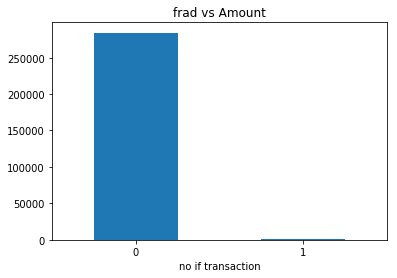

In [61]:
val.plot(kind = 'bar', rot=1)
plt.title('frad vs Amount')
plt.xlabel('no if transaction')

In [0]:
Fraud = df[df['Class']==1]
Correct = df[df['Class']==0]

In [63]:
len(Fraud), len(Correct)

(492, 284315)

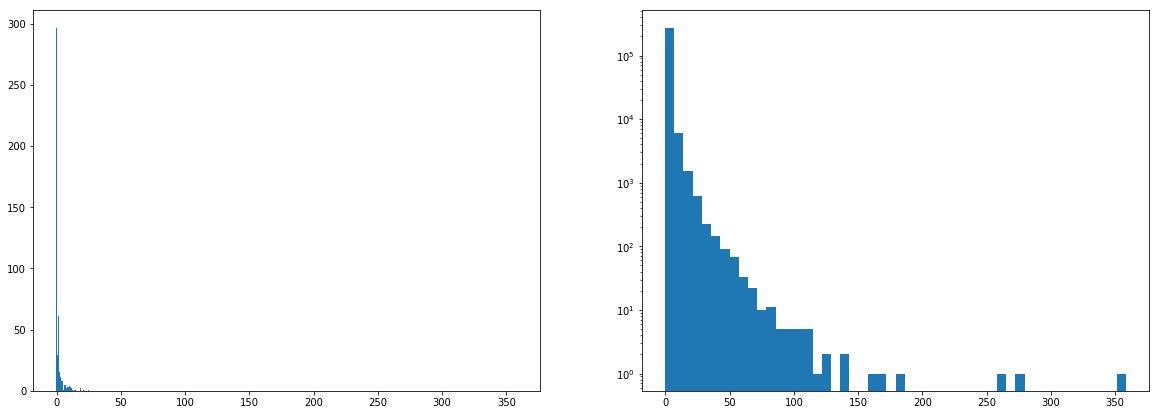

In [64]:
f, (a, b) = plt.subplots(1,2, sharex=True)
f.set_figwidth(20)
f.set_figheight(7)

a.hist(Fraud.Amount, bins=50)
a.set_label('Fraud')
b.hist(Correct.Amount, bins=50)
b.set_label('Normal')
plt.yscale('log')


Text(0.5, 1.0, 'Nornal Trasaction (Time vs amount )')

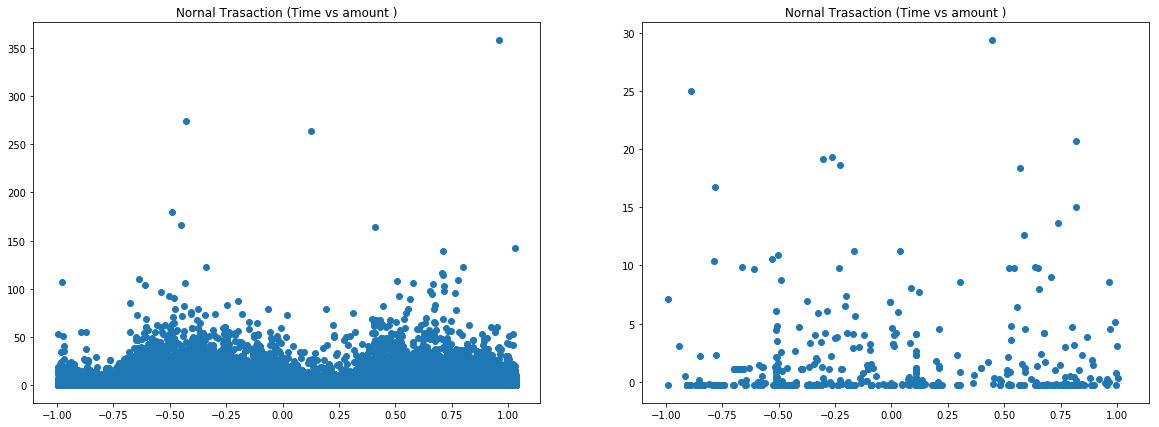

In [65]:
f1, (a1, b1) = plt.subplots(1, 2, sharex=True)
f1.set_figwidth(20)
f1.set_figheight(7)

a1.scatter(Correct.Time, Correct.Amount)
a1.set_title('Nornal Trasaction (Time vs amount )')

b1.scatter(Fraud.Time, Fraud.Amount)
b1.set_title('Nornal Trasaction (Time vs amount )')

# **Scaling Data**

In [0]:
from sklearn.preprocessing import RobustScaler

In [0]:
rob_scale = RobustScaler()

In [0]:
df['amount'] = rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['time'] = rob_scale.fit_transform(df['Time'].values.reshape(-1, 1))


df.drop(['Time', 'Amount'],axis=1 , inplace=True)


In [69]:
#  Chnging the position of time and amount

Amount = df['amount']
Time = df['time']

df.drop(['time','amount'],1 , inplace=True)
df.insert(0, 'Time', Time)
df.insert(1, 'Amount', Amount)
df.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
32825,-0.560533,1.159785,-0.717421,0.507095,2.667316,1.579514,-0.430896,-0.377681,0.967895,-0.593422,-0.419366,0.335592,0.420727,0.191674,0.938167,-0.463227,1.999354,-0.691489,-0.012080,0.257326,1.092389,0.383938,0.149146,0.863216,-0.146742,0.963969,0.179937,-0.111020,-0.291733,-0.332961,0
105106,-0.180066,-0.289387,1.295492,0.164442,-0.193390,0.317424,0.120935,-0.116020,-0.144528,0.104242,0.082173,-0.067401,0.329600,-0.267118,-1.168327,0.140219,0.644962,1.086563,-0.594158,0.762942,0.541746,-0.129840,-0.330414,-1.056303,-0.008875,-0.919468,0.290828,0.154516,-0.038226,0.005461,0
234783,0.745039,0.011877,1.998734,-0.101832,-1.060963,1.421270,0.353400,0.161205,0.052939,-0.121770,1.025220,-0.041433,-2.206241,0.969017,0.966253,-0.515678,-1.797522,-0.590328,-0.272198,-0.691883,0.675666,-0.174967,-0.384550,-0.682227,0.079096,-1.005920,0.228153,-0.762120,0.041952,-0.048771,0
135346,-0.040907,-0.027947,-0.894345,1.411456,1.890585,0.842402,-0.423331,-0.456748,0.333389,0.352632,-0.978224,-0.690654,-0.379247,0.586828,1.181064,0.278863,1.242791,0.066788,-0.137226,-0.018366,0.509942,0.040831,-0.072354,-0.345741,-0.095942,0.381302,0.189999,-0.491724,-0.027928,0.031033,0
181841,0.475205,0.237546,-3.317815,1.831632,-1.220921,-2.197457,-0.564272,-0.612584,-0.201614,1.571183,0.074850,-1.197383,-2.550358,-0.822313,-2.084363,1.375948,-0.798845,1.009245,-0.082551,-0.425740,-0.505629,-0.576386,-0.238980,-1.432068,-0.251164,0.064733,0.716092,0.891442,-0.994776,-0.073632,0


# Balancing Data

Since its a Balance data ie Normal Trancection are(99.82 %) and Fraud Transections(.17%) are so we are balancing the Data

```
```


By ***Under Sampling Data*** Techinque

In [70]:
df = df.sample(frac=1)
df.shape

(284807, 31)

In [71]:
# We ha fraud transaction define above
Normal = df[df['Class']==0][:492]
Normal.shape, Fraud.shape

((492, 31), (492, 31))

In [72]:
new_dist = pd.concat([Fraud, Normal])
new_dist.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
150654,0.107403,-0.307273,-3.765680,5.890735,-10.202268,10.259036,-5.611448,-3.235376,-10.632683,3.272716,-5.268905,-11.182125,8.879476,-18.431131,-0.232822,-15.021657,0.141186,-12.186362,-20.165567,-7.051651,2.500827,1.194137,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,1
234632,0.744381,-0.285195,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,1.991361,-3.986416,0.577207,-8.485795,-0.794782,-0.666134,-1.372629,-0.104313,-1.466911,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1
226814,0.706258,9.020471,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,-6.540989,4.404578,-4.938159,-0.740985,-7.462961,0.534968,-4.671032,-4.472403,-0.982090,3.490069,-0.338707,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,1
231978,0.731987,-0.195626,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,-0.887242,-1.594258,-0.338775,-0.978065,-3.688826,-1.487083,0.526946,2.347023,1.691220,-0.736111,-1.424486,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,1
172787,0.429352,1.713407,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,-4.820779,4.176098,-4.619010,0.742690,-7.636963,-0.197888,-4.140396,-7.604715,-1.524505,1.271322,0.133106,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,1


In [0]:
#  shuffle data
new_df = new_dist.sample(frac=1, random_state=42)

In [0]:
new_fraud = new_df[new_df['Class']==1]
new_normal = new_df[new_df['Class']==0]

In [75]:
new_val = pd.value_counts(new_df['Class'])
new_val

1    492
0    492
Name: Class, dtype: int64

Text(0, 0.5, 'No of transections')

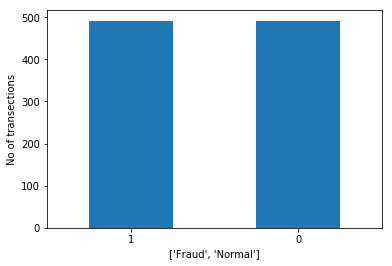

In [76]:
new_val.plot(kind = 'bar', rot=1)
plt.xlabel(['Fraud', 'Normal'])
plt.ylabel('No of transections')

Text(0.5, 1.0, 'Normal')

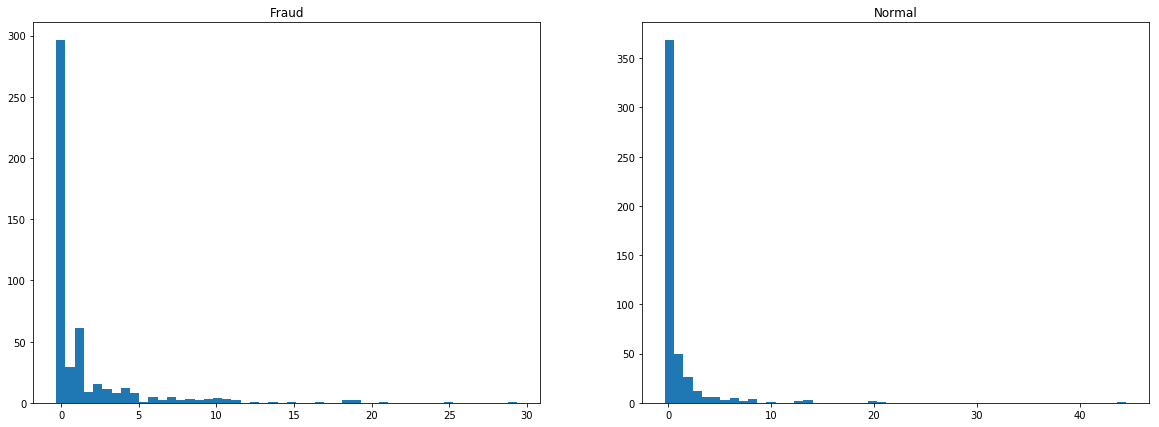

In [77]:
f,(a,b) = plt.subplots(1, 2)
f.set_figheight(7)
f.set_figwidth(20)

a.hist(new_fraud.Amount, bins=50)
a.set_title('Fraud')
b.hist(new_normal.Amount, bins=50)
b.set_title('Normal')

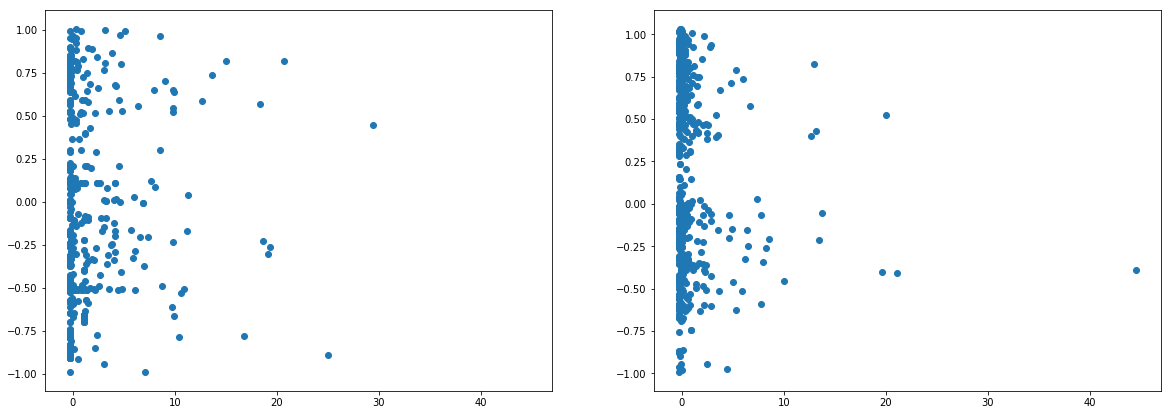

In [78]:
f,(a,b) = plt.subplots(1, 2, sharex=True)
f.set_figheight(7)
f.set_figwidth(20)

a.scatter(new_fraud.Amount, new_fraud.Time)
b.scatter(new_normal.Amount, new_normal.Time)

# Features Selection

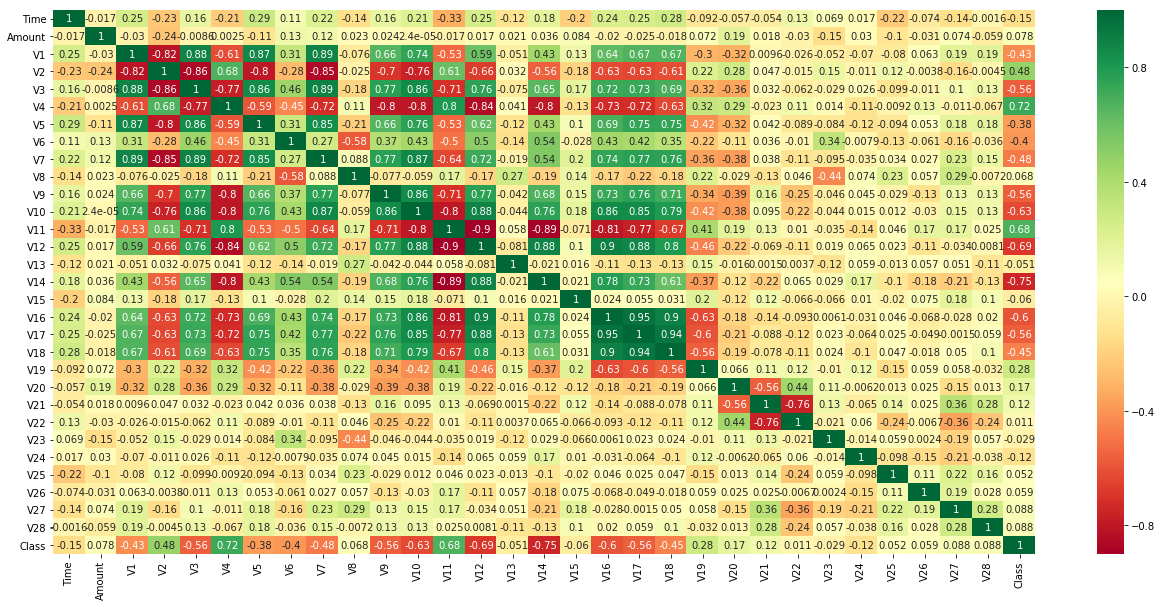

In [79]:
plt.figure(figsize = (22, 10))
sns.heatmap(new_df.corr(), cmap='RdYlGn', annot=True)

In [0]:
df.dropna(inplace=True)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
Xs = np.array(new_df.drop(['Class'],1))
ys = np.array(new_df['Class'])

In [0]:
clf = ExtraTreesClassifier()

In [84]:
model = clf.fit(Xs, ys)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
model.feature_importances_

array([0.00667745, 0.01572427, 0.0318764 , 0.0219588 , 0.0690212 ,
       0.10262798, 0.01095335, 0.0109091 , 0.03148501, 0.0107762 ,
       0.01148977, 0.11250897, 0.07296968, 0.13849954, 0.00981209,
       0.11058477, 0.00826186, 0.06407777, 0.03503899, 0.03710784,
       0.01329824, 0.01057297, 0.00929188, 0.00858158, 0.00406342,
       0.00598783, 0.006939  , 0.01019869, 0.01296675, 0.00573861])

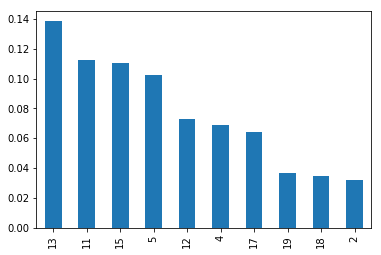

In [86]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.nlargest(10).plot(kind = 'bar')

In [87]:
outliners = len(new_fraud)/len(new_normal)
outliners

1.0

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

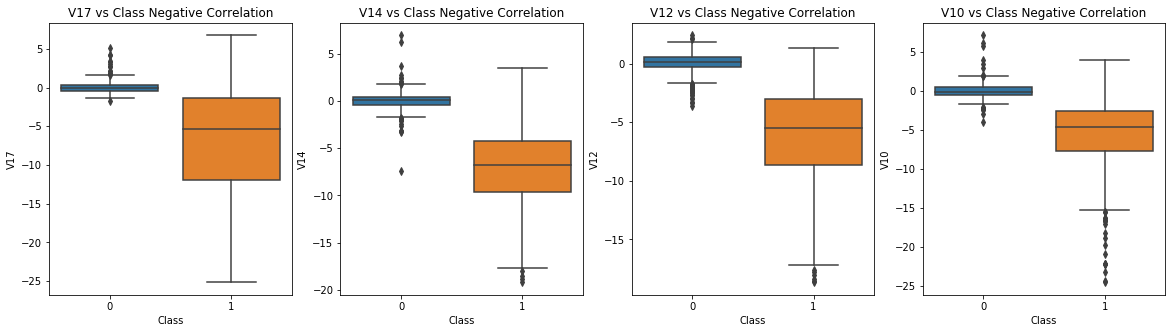

In [88]:
f, axes = plt.subplots(ncols=4, figsize=(20, 5))


sns.boxplot(x = new_df.Class, y = new_df.V17, data = new_df, ax = axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V14, data = new_df, ax = axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V12, data = new_df, ax = axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V10, data = new_df, ax = axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')


Text(0.5, 1.0, 'V10 vs Class Positive Correlation')

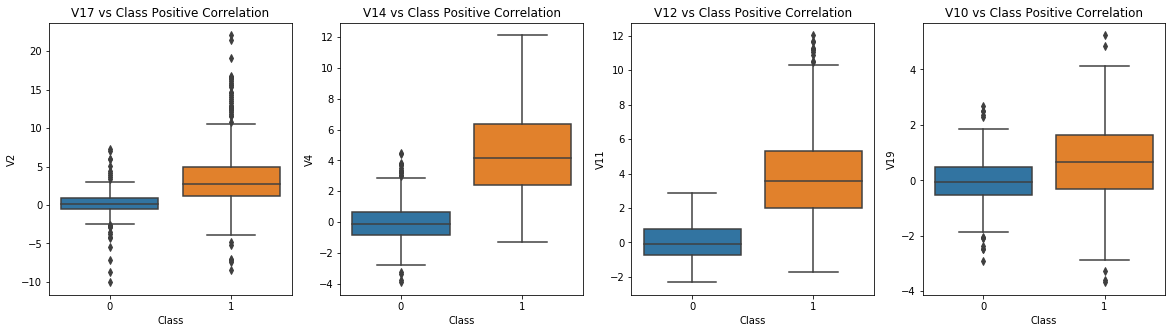

In [89]:
f, axes = plt.subplots(ncols=4, figsize=(20, 5))


sns.boxplot(x = new_df.Class, y = new_df.V2, data = new_df, ax = axes[0])
axes[0].set_title('V17 vs Class Positive Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V4, data = new_df, ax = axes[1])
axes[1].set_title('V14 vs Class Positive Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V11, data = new_df, ax = axes[2])
axes[2].set_title('V12 vs Class Positive Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V19, data = new_df, ax = axes[3])
axes[3].set_title('V10 vs Class Positive Correlation')


# Model , Train and Test

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [0]:
Xs = np.array(new_df.drop(['Class'],1))
ys = np.array(new_df['Class'])

In [0]:
X_train, X_test, y_train , y_test = train_test_split(Xs, ys, test_size = 0.2, random_state=42)

In [0]:
classifier = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}



In [94]:
type(classifier)

dict

In [95]:
from sklearn.model_selection import cross_val_score

for key, clf in classifier.items():
  clf.fit(X_train, y_train)
  training_score = cross_val_score(clf, X_train, y_train, cv=5,)
 
  print('Clasifier:', key ,"Has a accuracy of ", round(training_score.mean(),2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Clasifier: LogisiticRegression Has a accuracy of  0.95
Clasifier: KNearest Has a accuracy of  0.94
Clasifier: Support Vector Classifier Has a accuracy of  0.93
Clasifier: DecisionTreeClassifier Has a accuracy of  0.92


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Balancing Data 

Over Scaling data

In [0]:
from imblearn.over_sampling import RandomOverSampler

In [0]:
os = RandomOverSampler(ratio = 0.5)

In [0]:
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

In [0]:
X_os, y_os = os.fit_sample(X, y)

In [100]:
X_os.shape, y_os.shape

((426472, 30), (426472,))

# Training Model

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [0]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2)

In [0]:
classifier1={
    
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    
}

In [0]:
for clf_name, clf in classifier1.items():
  clf.fit(X_train_os, y_train_os)
  pred = cross_val_score(clf, X_train_os, y_train_os, cv = 5)
  print(clf_name ,"Acuracy", pred.mean())

# NN

In [0]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense

In [0]:
n_input = X_train.shape[1]

model = Sequential([
    Dense(n_input, input_shape = (n_input,), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(2, activation = 'softmax')
])

In [149]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [151]:
model.fit(X_train, y_train, batch_size=32, epochs =20, shuffle=True)

Epoch 1/20
787/787 [==============================] - 0s 527us/step - loss: 0.5580 - acc: 0.6252
Epoch 2/20
787/787 [==============================] - 0s 120us/step - loss: 0.3469 - acc: 0.8818
Epoch 3/20
787/787 [==============================] - 0s 130us/step - loss: 0.2635 - acc: 0.9276
Epoch 4/20
787/787 [==============================] - 0s 129us/step - loss: 0.2128 - acc: 0.9352
Epoch 5/20
787/787 [==============================] - 0s 126us/step - loss: 0.1777 - acc: 0.9441
Epoch 6/20
787/787 [==============================] - 0s 139us/step - loss: 0.1548 - acc: 0.9504
Epoch 7/20
787/787 [==============================] - 0s 135us/step - loss: 0.1378 - acc: 0.9530
Epoch 8/20
787/787 [==============================] - 0s 133us/step - loss: 0.1246 - acc: 0.9543
Epoch 9/20
787/787 [==============================] - 0s 123us/step - loss: 0.1144 - acc: 0.9619
Epoch 10/20
787/787 [==============================] - 0s 123us/step - loss: 0.1061 - acc: 0.9644
Epoch 11/20
787/787 [========

In [0]:
n_input = X_train_os.shape[1]
model_os = Sequential([
    Dense(n_input, input_shape = (n_input,), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(2, activation = 'softmax')
])

In [156]:
model_os.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_31 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [163]:
model.fit(X_train_os, y_train_os, batch_size=32, epochs = 20, shuffle=True)

Epoch 1/20
341177/341177 [==============================] - 44s 130us/step - loss: 0.0029 - acc: 0.9997
Epoch 2/20
341177/341177 [==============================] - 44s 129us/step - loss: 0.0029 - acc: 0.9997
Epoch 3/20
341177/341177 [==============================] - 44s 129us/step - loss: 0.0025 - acc: 0.9997
Epoch 4/20
341177/341177 [==============================] - 43s 126us/step - loss: 0.0023 - acc: 0.9997
Epoch 5/20
341177/341177 [==============================] - 43s 127us/step - loss: 0.0023 - acc: 0.9997
Epoch 6/20
341177/341177 [==============================] - 43s 126us/step - loss: 0.0023 - acc: 0.9997
Epoch 7/20
341177/341177 [==============================] - 43s 126us/step - loss: 0.0078 - acc: 0.9994
Epoch 8/20
341177/341177 [==============================] - 44s 128us/step - loss: 0.0024 - acc: 0.9997
Epoch 9/20
341177/341177 [==============================] - 43s 125us/step - loss: 0.0024 - acc: 0.9997
Epoch 10/20
341177/341177 [==============================] - 43s